## Fetching the data from db

In [1]:
import importlib
import utils2

importlib.reload(utils2)
from utils2 import *

In [2]:
all_data = aggregate_joular_node_entity_by_value("spring-boot",25, excluded_words="testsupport|Test")

Number of documents : 50


## Outliers removal and distribution of all the values

Removing all outliers from the data, using the z-score method

In [3]:
all_data_without_outliers = removeOutliers(all_data)

Len with outliers :  50
Len without outliers (with at least 25 values) :  47


### Shapiro-Wilk test

Testing all data without outliers to see which ones follow a normal distribution and which ones do not.

In [4]:
all_normal_data_without_outliers = removeNonNormalData(all_data_without_outliers)

Number of normal distributions :  26


### Boxplot of the normal distributions without outliers

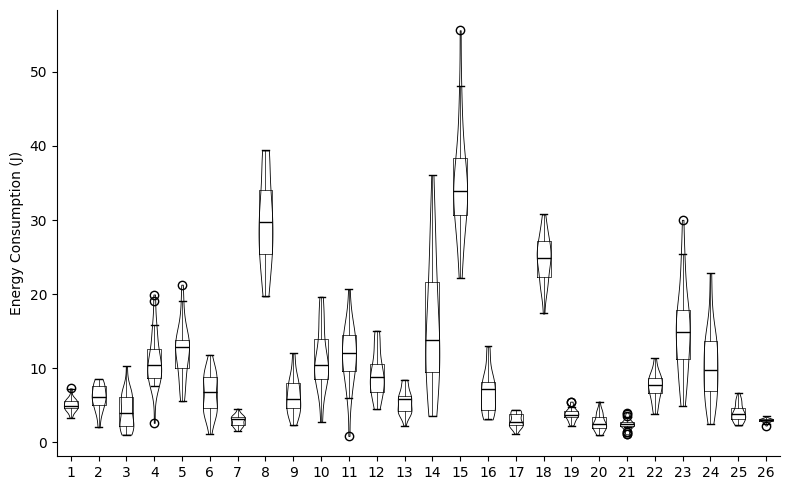

In [5]:
normal_values = [doc["values"] for doc in all_normal_data_without_outliers]
#labels = [doc["measurableElement"]["classMethodSignature"] for doc in all_normal_data_without_outliers]
violin_and_boxplot(normal_values)

org.springframework.boot.env.OriginTrackedYamlLoaderTests.canLoadFilesBiggerThan3Mb 193
org.springframework.boot.env.OriginTrackedYamlLoader.load 84
org.springframework.boot.env.OriginTrackedYamlLoader$OriginTrackingConstructor.getData 99
org.springframework.boot.env.OriginTrackedYamlLoader$OriginTrackingConstructor.constructObject 119
org.springframework.boot.env.OriginTrackedYamlLoader$OriginTrackingConstructor.constructObject 113



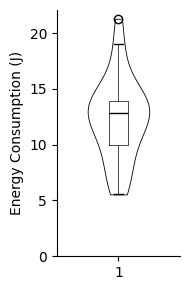

org.springframework.boot.cloud.cloudfoundry.CloudFoundryVcapEnvironmentPostProcessorTests.testServiceProperties 101
org.springframework.boot.cloud.CloudFoundryVcapEnvironmentPostProcessor.postProcessEnvironment 126
org.springframework.boot.cloud.CloudFoundryVcapEnvironmentPostProcessor.getPropertiesFromApplication 150
org.springframework.boot.json.JacksonJsonParser.parseMap 56
org.springframework.boot.json.AbstractJsonParser.tryParse 53
org.springframework.boot.json.JacksonJsonParser.lambda$parseMap$0 56
org.springframework.boot.json.JacksonJsonParser.getObjectMapper 66



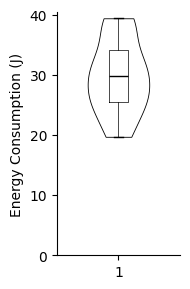

org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 103
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.runTest 118
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 88
org.springframework.boot.validation.MessageInterpolatorFactoryWithoutElIntegrationTests.getObjectShouldUseFallback 51
org.springframework.boot.validation.MessageInterpolatorFactory.getObject 70
org.springframework.boot.validation.MessageInterpolatorFactory.getMessageInterpolator 79



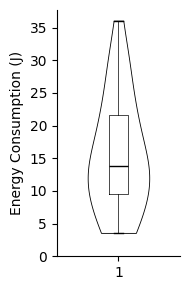

org.springframework.boot.web.client.ClientHttpRequestFactoriesTests.getOfOkHttpFactoryReturnsOkHttpFactory 73
org.springframework.boot.web.client.ClientHttpRequestFactories.get 127
org.springframework.boot.web.client.ClientHttpRequestFactories$OkHttp.get 207
org.springframework.boot.web.client.ClientHttpRequestFactories$OkHttp.createRequestFactory 226



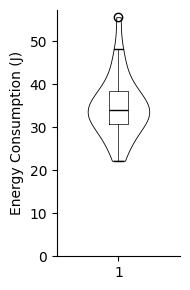

org.springframework.boot.SpringApplicationTests.environmentIsConvertedIfTypeDoesNotMatch 1067
org.springframework.boot.SpringApplication.run 315
org.springframework.boot.SpringApplication.refreshContext 439
org.springframework.boot.SpringApplication.refresh 737
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.refresh 66
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.onRefresh 81
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.createWebServer 96
org.springframework.boot.web.reactive.context.WebServerManager.<init> 50
org.springframework.boot.web.embedded.netty.NettyReactiveWebServerFactory.getWebServer 71
org.springframework.boot.web.embedded.netty.NettyReactiveWebServerFactory.createHttpServer 161



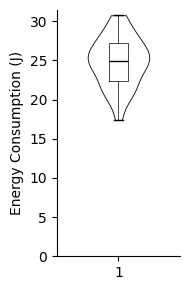

org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestTemplateMethod 82
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 103
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.runTest 118
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestTemplateMethod 82
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 88
org.springframework.boot.web.client.AbstractClientHttpRequestFactoriesTests.connectWithSslBundle 135
org.springframework.boot.web.embedded.tomcat.TomcatWebServer.stop 331
org.springframework.boot.web.embedded.tomcat.TomcatWebServer.stopTomcat 273



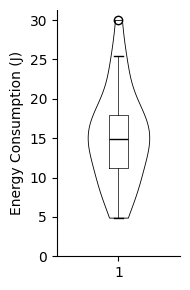

/home/jerome/Documents/Assistant/Recherche/joular-scripts/sentinel-notebook/utils2.py:290: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


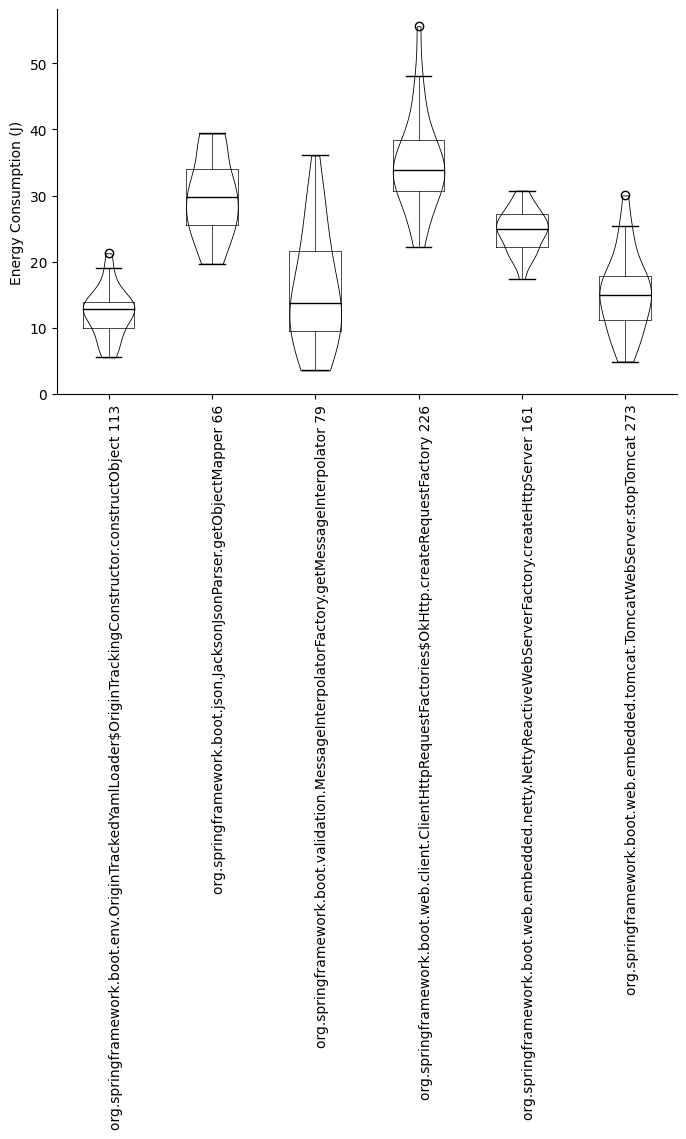

In [10]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *


all_project_means = mean_dict(all_normal_data_without_outliers)
#violin_and_boxplot(all_project_means)
highest_quantile = filter_highest_data(all_normal_data_without_outliers, all_project_means, 20)
first_quartile_values = [doc["values"] for doc in highest_quantile]
labels = [doc["measurableElement"]["classMethodSignature"] + " " + str(doc["lineNumber"]) for doc in highest_quantile]

for doc in highest_quantile:
    label = f'{doc["measurableElement"]["classMethodSignature"]} {doc["lineNumber"]}'
    get_ancestors_from_joular_node_entity_id(doc["id"])
    violin_and_boxplot(doc["values"], bottom=0, height=3, width=2, save_path=label)
    print("=========================================================")

violin_and_boxplot(first_quartile_values, labels=labels, bottom=0)